## Medical Cost Prediction using Regression 

Dataset - [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance
)

**The data consists of the following attributes:**

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

**Task:**

The task is to build a model that given attributes/features: Age, Sex,BMI, Children, Smoker, Region predicts Charges (Medical Insurance cost).





In [344]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **A - Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?**

In [345]:
data = pd.read_csv("insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


**How much data is present?**

In [346]:
rows, cols = data.shape
print("Number of rows: ", rows, end=" ")
print("\nNumber of columns: ", cols)

Number of rows:  1338 
Number of columns:  7


It is observed that the dataset contains 1338 rows and 7 columns.

In [347]:
# Getting the concise summary about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [348]:
# Understanding the structure and completeness of the data,
# Identifying missing values, and checking the data types of the columns.

for column in data.columns:
  print(data[column].describe())

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object
count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000


In [349]:
#Checking what attributes/features are categorical and continuous-valued
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**What attributes/features are continuous valued?**

In [350]:
#Getting the perfect count of continuous-valued attributes in the data
cont = data.select_dtypes(include=['float64', 'int64']).dtypes
cont

age           int64
bmi         float64
children      int64
charges     float64
dtype: object

In [351]:
continuous_attributes= ['age', 'bmi', 'children', 'charges']
print("Continuous-valued attributes:", continuous_attributes)

Continuous-valued attributes: ['age', 'bmi', 'children', 'charges']


**Which attributes are categorical?**

In [352]:
cat = data.select_dtypes(include=['object']).dtypes
cat

sex       object
smoker    object
region    object
dtype: object

In [353]:
categorical_values=['sex','smoker', 'region']

In [354]:
print("Categorical-valued attributes:", categorical_values)

Categorical-valued attributes: ['sex', 'smoker', 'region']


## **B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

### **Summary Statistics**

Here for statistical analysis of each attribute, we used ***describe***, which is used to generate summary statistics of a Dataframe. Using this, we can get an initial sense of a data distribution and whether there are any outliers present in the data.

In [355]:
#Describing the statistical values of each features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Checking any missing values present in the dataset.

In [356]:
# Checking if any missing values are present
missing_values = data.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


By analysing the missing values, it was found that there are no missing values and hence no special treatment is necessary for dealing with null values.

### **Visualization of each attributes**

Creating ***histograms*** for each feature allows us to visually represent the distribution of data, providing a graphical depiction of the frequency or count of data points within specific value ranges for each attribute.

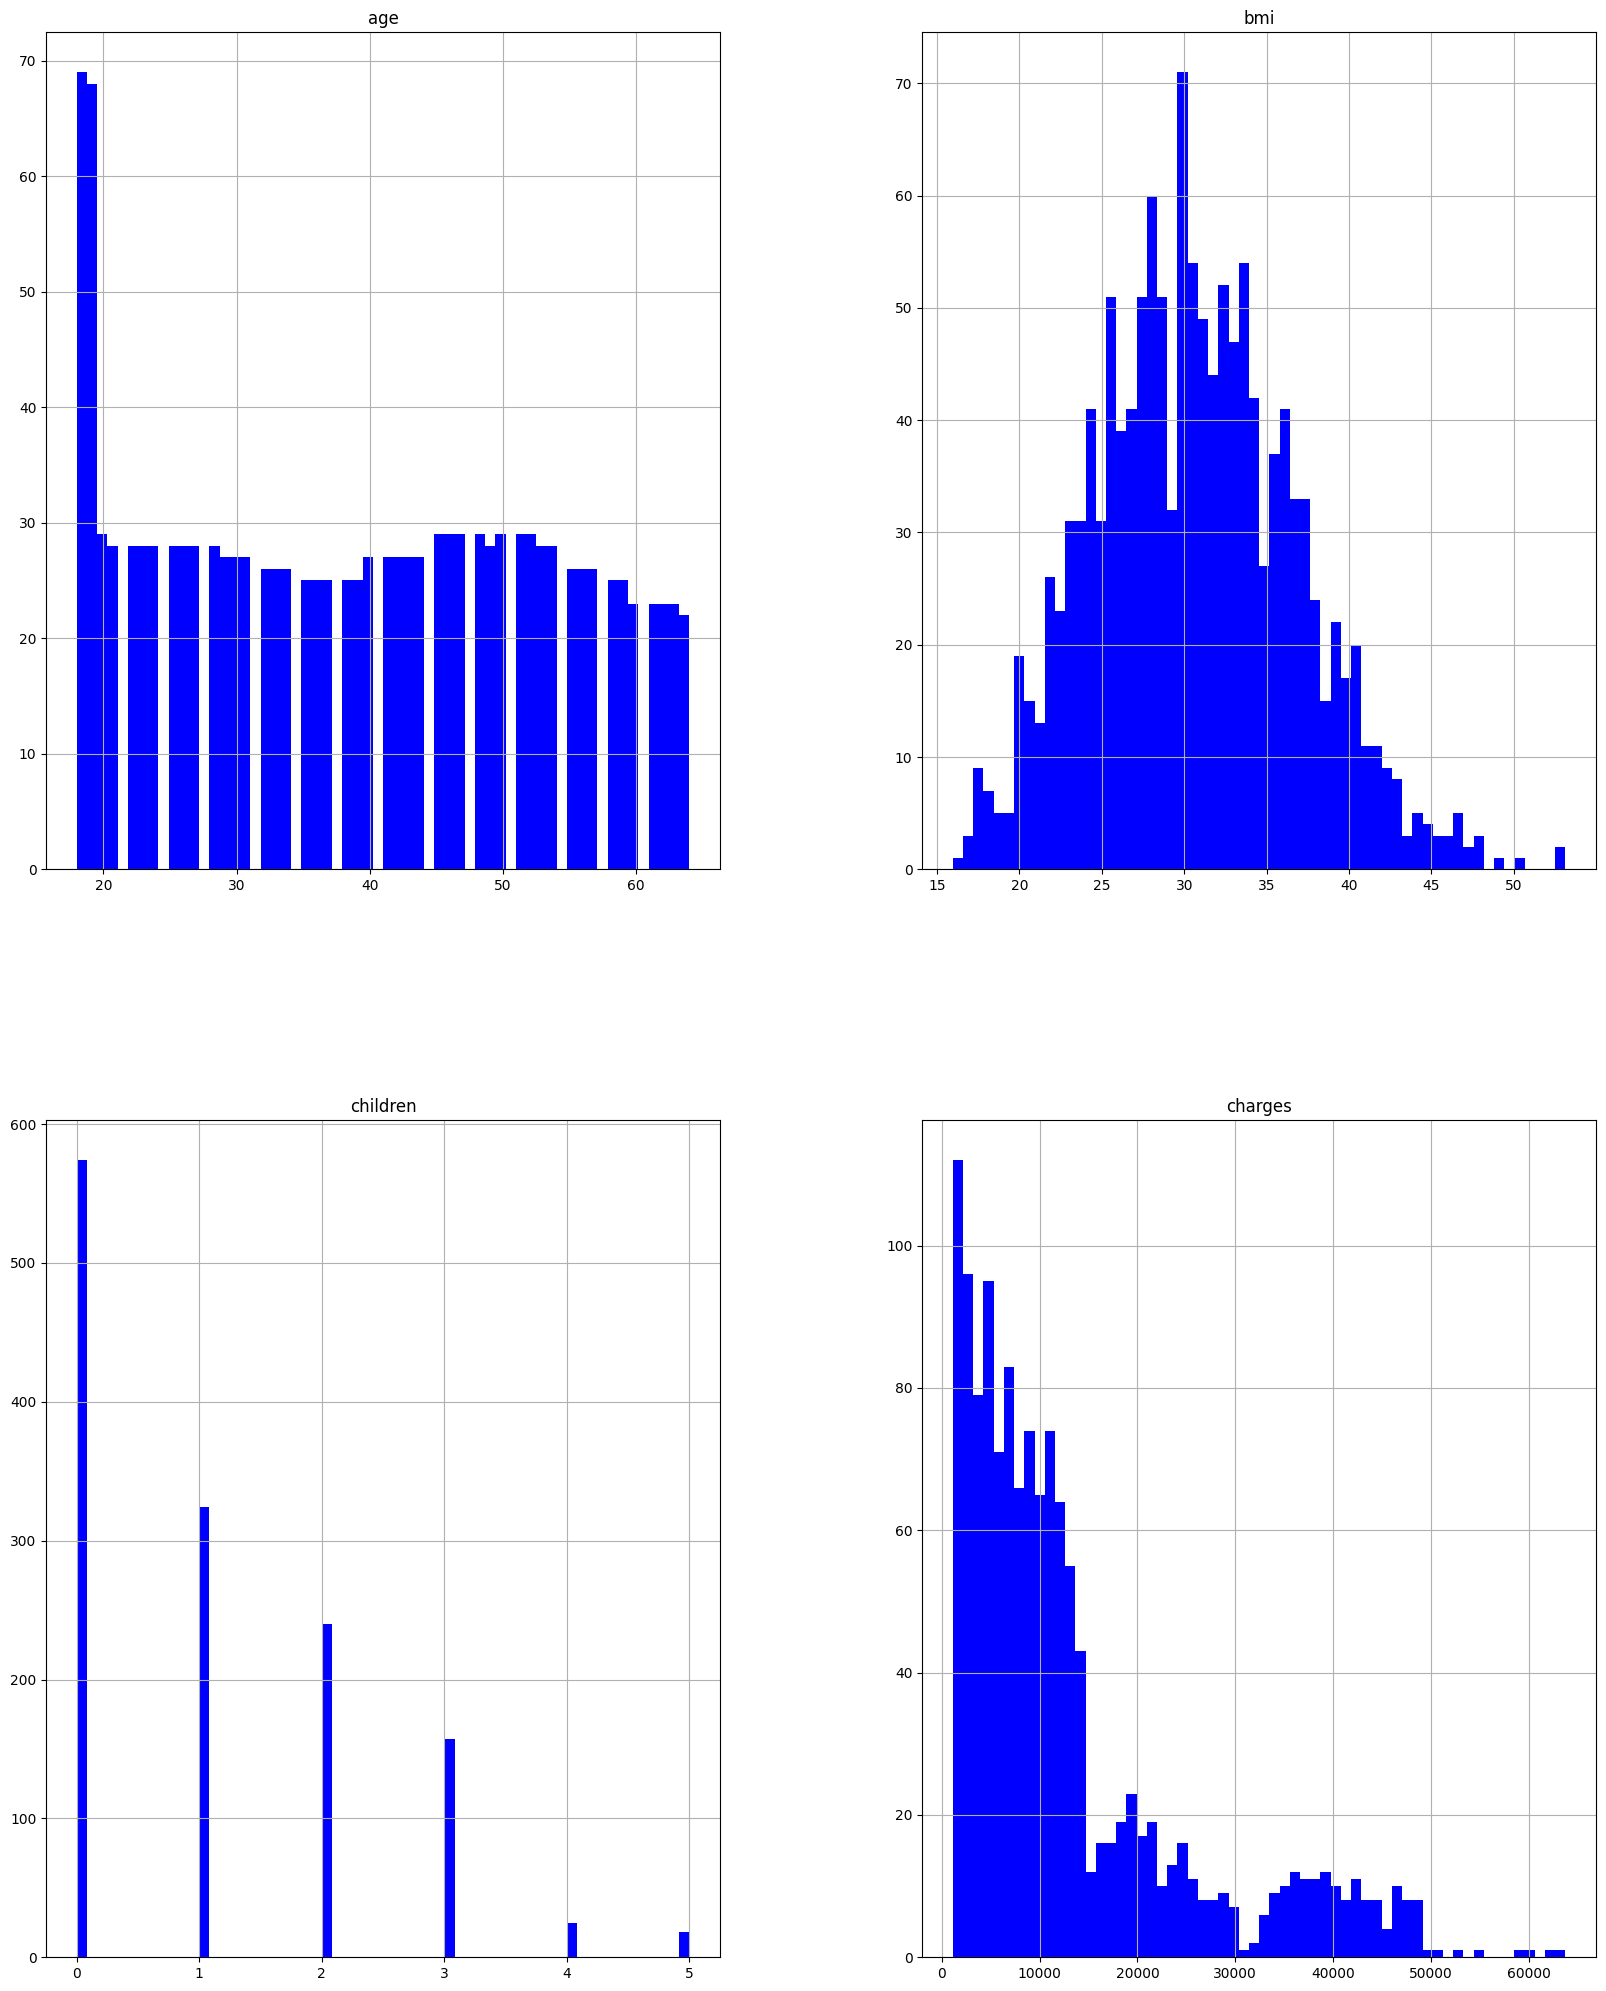

In [357]:
#Plotting histogram for each attributes
data.hist(bins=60, figsize=(20,25), color='blue')
plt.show()

Here, we used boxplots to provide a concise summary of the distribution of data, including its central tendencies, spread, and potential outliers.


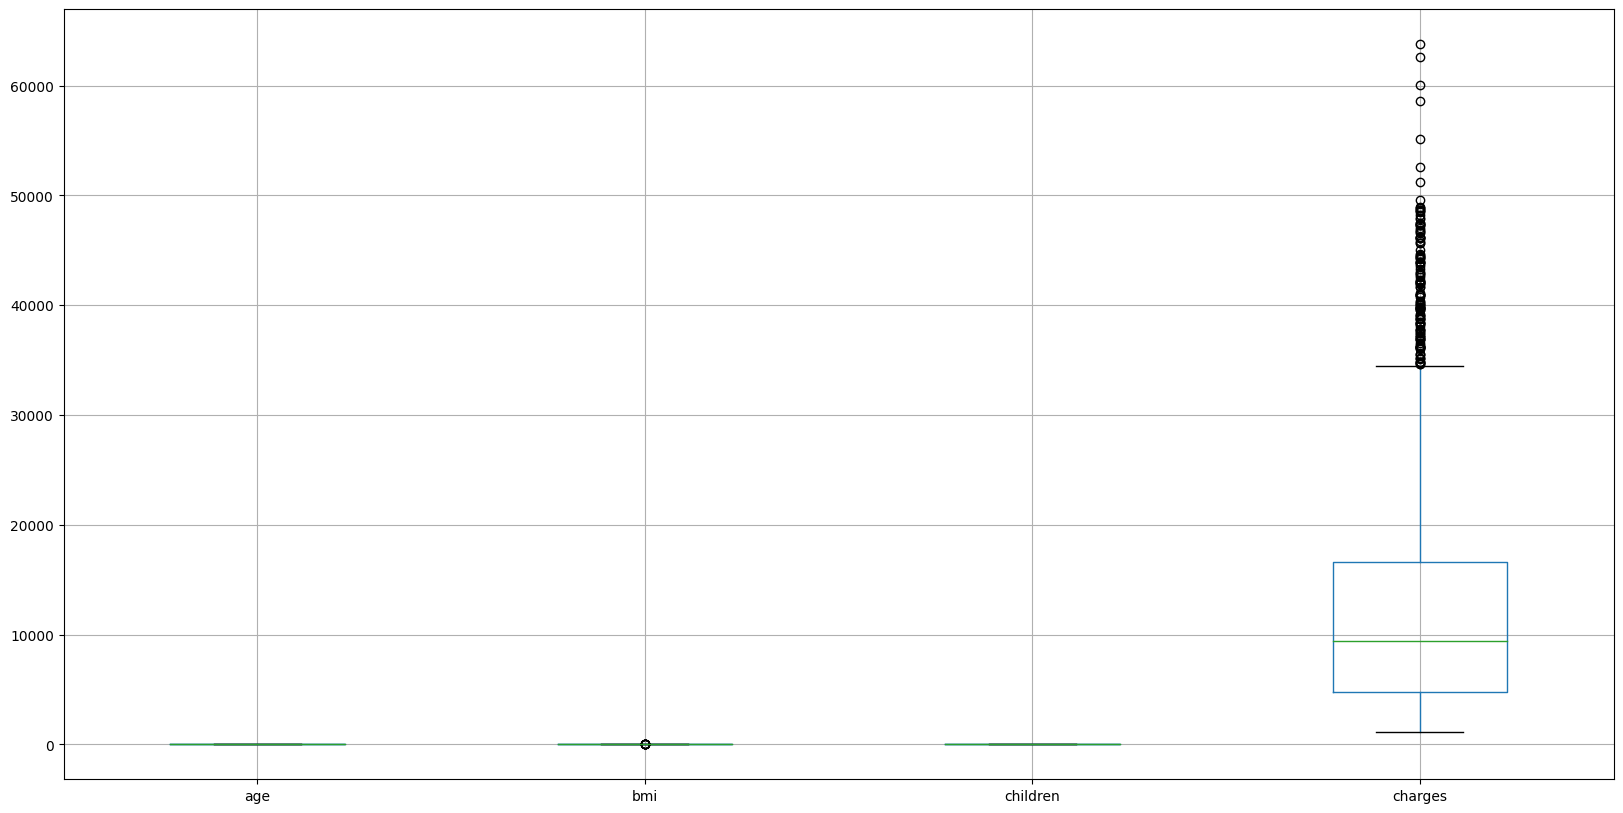

In [358]:
data.boxplot(figsize=(20, 10), fontsize=10)
plt.show()

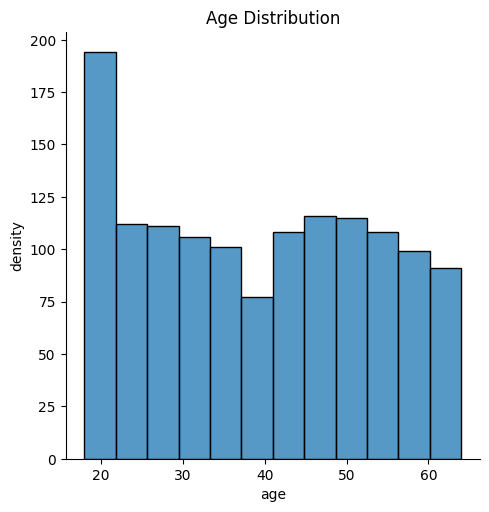

In [359]:
# Age Distribution Plot

sns.displot(data['age'])
plt.title('Age Distribution')
plt.ylabel('density')
plt.xlabel('age')
plt.show()

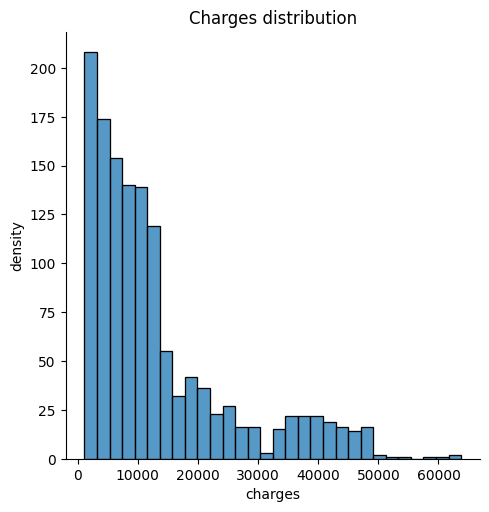

In [360]:
# Charges Distribution Plot
sns.displot(data['charges'])
plt.title('Charges distribution')
plt.ylabel('density')
plt.xlabel('charges')
plt.show()

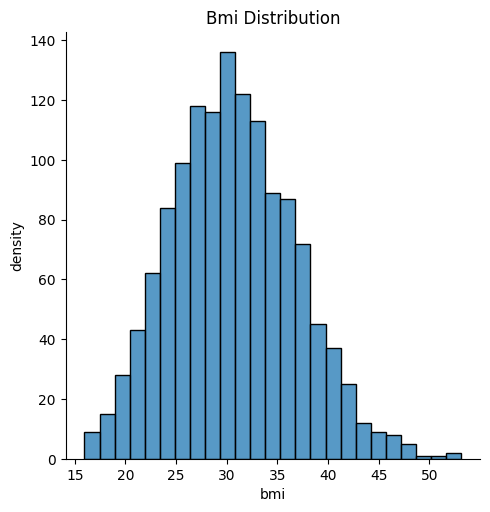

In [361]:
# BMI Distribution Plot
sns.displot(data['bmi'])
plt.title('Bmi Distribution')
plt.ylabel('density')
plt.xlabel('bmi')
plt.show()

<Figure size 600x400 with 0 Axes>

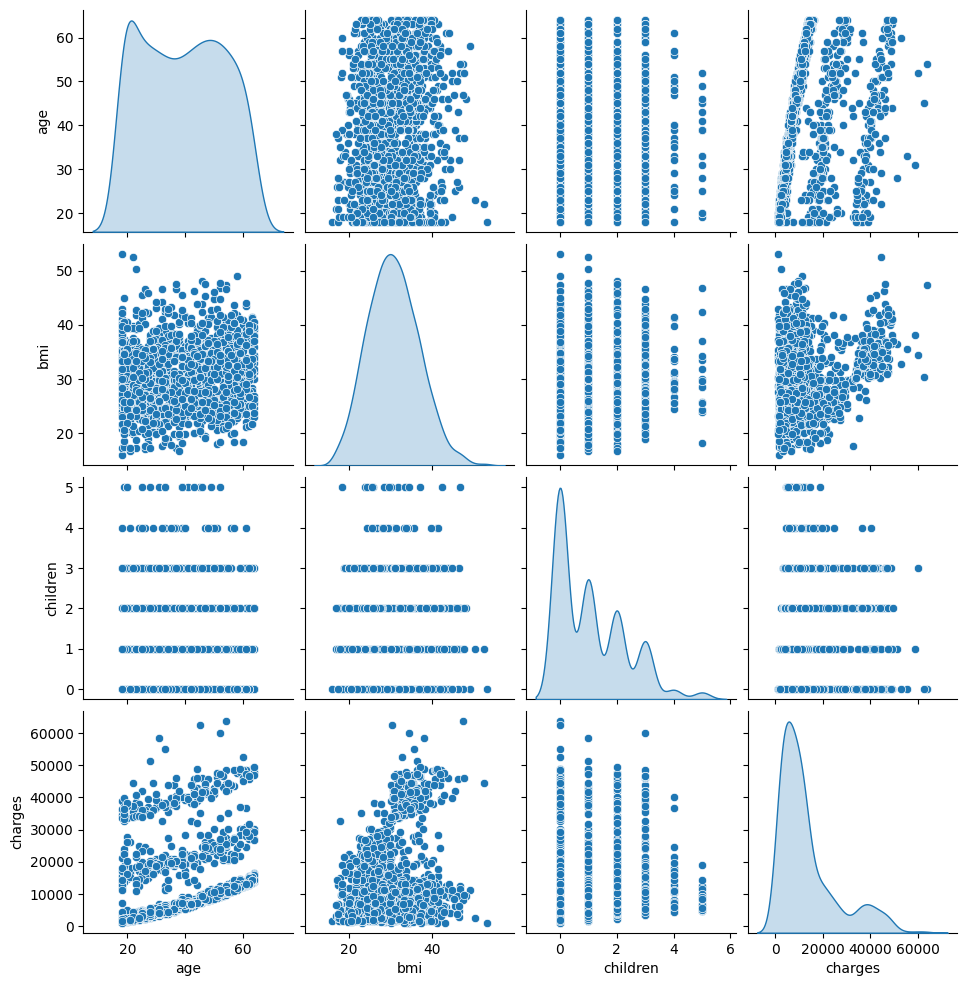

In [362]:
# Pair plots
fig = plt.figure(figsize = (6, 4))
sns.pairplot(data,diag_kind='kde');

**Noticable traits -**

1) BMI is almost normally distributed.

2) A vast majority of charges lies between 10,000 and 20,000 USD.

3) The frequency count for age is the maximum for 20-25 years.

4) The label charges has too many outliers.

**Special Treatment - Converting categorical labels into numerical**

For training the linear regression model, categorical variables such as sex, smoker, and region must be converted to numerical attributes.

This is done using the LabelEncoder function from sklearn.

In [363]:
## Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region = label.transform(data.region)
data.dtypes

attributes = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
attributes

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

## **C. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

**PCC Table**

While analysing the relationship between the data attributes and between the data attributes and label, computing the Pearson Correlation Coefficient(PCC) and generating the scatter plots for every individual attribute with the target variable(label) provides the best information.

- **In our code, correlation matrix contains the PCC values between all pairs of continuous attributes. By using this matrix and the heatmap, we can identify which attributes have the strong positive and negative linear relationship.**


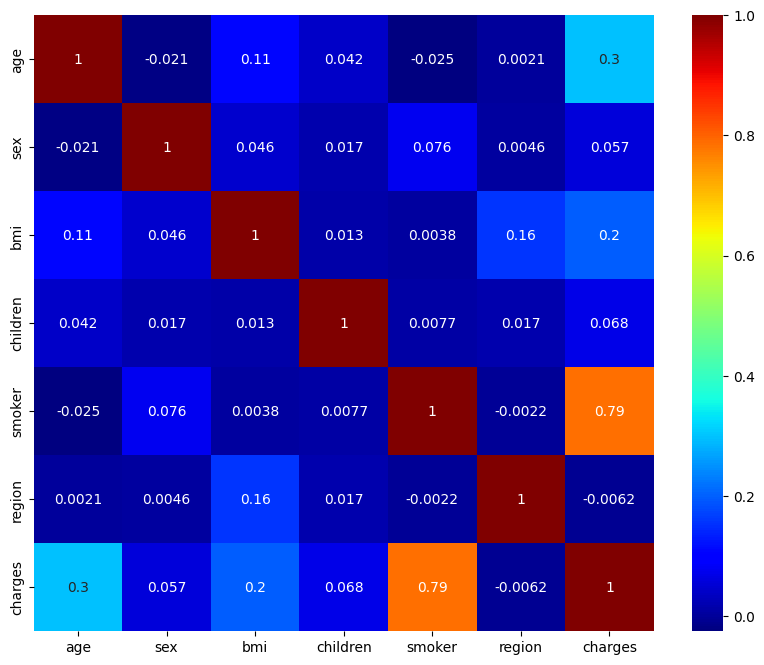

In [364]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="jet")
plt.show()

**Scatter Plots**
- **Plotted the scatter plot for every attribute with the target variable(charges)**.
- **The primary purpose was to examine how each attribute correlates with the "charges" variable and visualize their relationships**

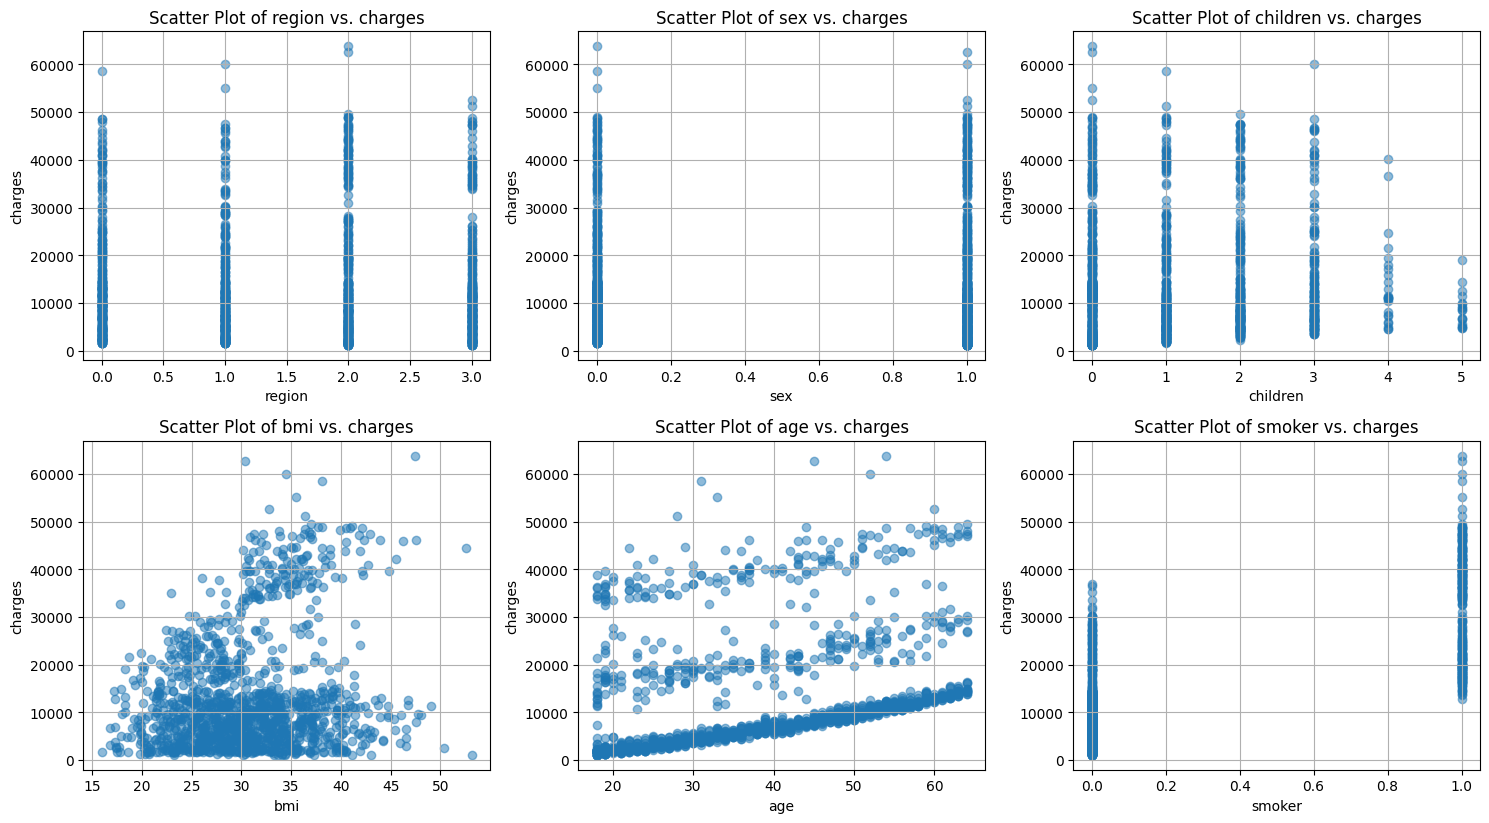

In [365]:
subplots_per_row = 3

label = "charges"
correlation_result = {}
for attribute in attributes:
    pcc = np.corrcoef(data[attribute], data[label])
    correlation_result[attribute] = pcc[0, 1]

# Sorting the attributes according to their PCC values
sorted_attributes = {k: v for k, v in sorted(correlation_result.items(), key=lambda x: x[1])}

# Create subplots
fig, axes = plt.subplots(
    nrows=len(sorted_attributes) // subplots_per_row + 1,
    ncols=subplots_per_row,
    figsize=(15, 4 * (len(sorted_attributes) // subplots_per_row + 1)),
)

# Iterate through the attributes and create scatter plots
for idx, (attribute, pcc) in enumerate(sorted_attributes.items()):
    row, col = idx // subplots_per_row, idx % subplots_per_row
    ax = axes[row, col]

    ax.scatter(data[attribute], data[label], alpha=0.5)
    ax.set_title(f'Scatter Plot of {attribute} vs. {label}')
    ax.set_xlabel(attribute)
    ax.set_ylabel(label)
    ax.grid(True)

# Remove empty subplots if needed
for idx in range(len(sorted_attributes), len(axes.flat)):
    fig.delaxes(axes.flatten()[idx])

# Adjust spacing
plt.tight_layout()
plt.show()


**Discussion**

- From the PCC table, we can see that "charges" the target variable has a positive correlation with "smoker" of **0.79** indicating a strong relationship between them.
- It can also be analysed that age and charges have a significant positive correlation of **0.3.**
- Through the scatter plot, it is clear that the person who smokes ends up paying more insurance charges.
- An Average BMI between 25 and 30 has the lowest values for charges as infered from the scatter plot.
- There is no significant correlation betweeen the sex of a person and the charges they end up paying.

## **D. Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.**

- The primary purpose of train_test_split is to partition a dataset into two subsets: one for training machine learning models and the other for testing or evaluating their performance.
- We used the training dataset (X_train and y_train) to train our machine learning model and the test dataset (X_test) to evaluate its performance.

**Correctly splitting into test/train**

In [366]:
# Data Splitting
from sklearn.model_selection import train_test_split

# Split the data into training and test (80% training and 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


**Verification**

In [367]:
# Distribution of classes in train and test datasets

continuos_train = train_data[attributes]
continuos_test = test_data[attributes]
print("Total data in dataset (rows): ", data.shape[0])
print(data.value_counts())
print("-----------------------------------------------------------------------------------------")
print("80% train data: ",continuos_train.value_counts())
print("-----------------------------------------------------------------------------------------")
print("20% test data: ", continuos_test.value_counts())

Total data in dataset (rows):  1338
age  sex  bmi     children  smoker  region  charges    
19   1    30.590  0         0       1       1639.56310     2
47   1    29.830  3         0       1       9620.33070     1
48   0    25.850  3         1       2       24180.93350    1
          22.800  0         0       3       8269.04400     1
47   1    47.520  1         0       2       8083.91980     1
                                                          ..
31   0    25.740  0         0       2       3756.62160     1
          23.600  2         0       3       4931.64700     1
          21.755  0         0       1       4134.08245     1
30   1    44.220  2         0       2       4266.16580     1
64   1    40.480  0         0       2       13831.11520    1
Length: 1337, dtype: int64
-----------------------------------------------------------------------------------------
80% train data:  age  sex  bmi     children  smoker  region
18   0    38.280  0         0       2         2
          30

**Verifying that your test portion of the data is representative of the entire dataset.**
- By printing the value counts of classes or values in the training and test datasets, we assess whether the test portion is representative of the entire dataset. If the distributions in the training and test datasets are similar, it suggests that the split is reasonable and that the test data is representative.

- As done in the above step, it is clear that the test data is representative of the entire dataset.

##**E**.
##**Part 1 - Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. For SGD, display the training and validation loss as a function of training iteration.**

##**Part 2 - Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact.**

##**Part 3 - Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings.**



### Part 1

**Linear Regression using K-Fold with the Normal Equation**

In [368]:
# Defining features (X) and target (y)
X_train = train_data[attributes]
y_train = train_data['charges']

X_test = test_data[attributes]
y_test = test_data['charges']

# Adding a column of ones to X_train for the bias term
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Calculating the closed-form solution using the Normal Equation
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print('The value of theta is', theta)

The value of theta is [-1.19466066e+04  2.57056264e+02 -1.87914567e+01  3.35781491e+02
  4.25091456e+02  2.36478181e+04 -2.71284266e+02]


In [369]:
from sklearn.linear_model import LinearRegression

# Predicting on the training data
y_train_pred = X_train @ theta

# Initialize Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.intercept_, lr_model.coef_

(-11946.60656726302,
 array([ 0.00000000e+00,  2.57056264e+02, -1.87914567e+01,  3.35781491e+02,
         4.25091456e+02,  2.36478181e+04, -2.71284266e+02]))

In [370]:
from sklearn.model_selection import cross_val_score

# Performing 4-fold cross-validation for MSE score
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=4)

# Calculating the Mean squared error (MSE) for each fold
mse_scores = np.sqrt(cv_scores)

# Printing the MSE scores for each fold
for i, mse in enumerate(mse_scores):
    print(f'Fold {i+1} MSE: {mse:.4f}')

# Calculating and printing the average MSE across all folds
avg_mse = np.mean(mse_scores)
print(f'Average MSE: {avg_mse:.4f}')

Fold 1 MSE: 0.8599
Fold 2 MSE: 0.8917
Fold 3 MSE: 0.7945
Fold 4 MSE: 0.8666
Average MSE: 0.8532


In [371]:
from sklearn.model_selection import cross_val_score

# Performing 4-fold cross-validation for R2 score
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=4, scoring='r2')

# Printing the R2 scores for each fold
for i, r2 in enumerate(r2_scores):
    print(f'Fold {i+1} R2: {r2:.4f}')

# Calculating and printing the average R2 across all folds
avg_r2 = np.mean(r2_scores)
print(f'Average R2: {avg_r2:.4f}')

Fold 1 R2: 0.7394
Fold 2 R2: 0.7952
Fold 3 R2: 0.6312
Fold 4 R2: 0.7510
Average R2: 0.7292


<Figure size 1000x1000 with 0 Axes>

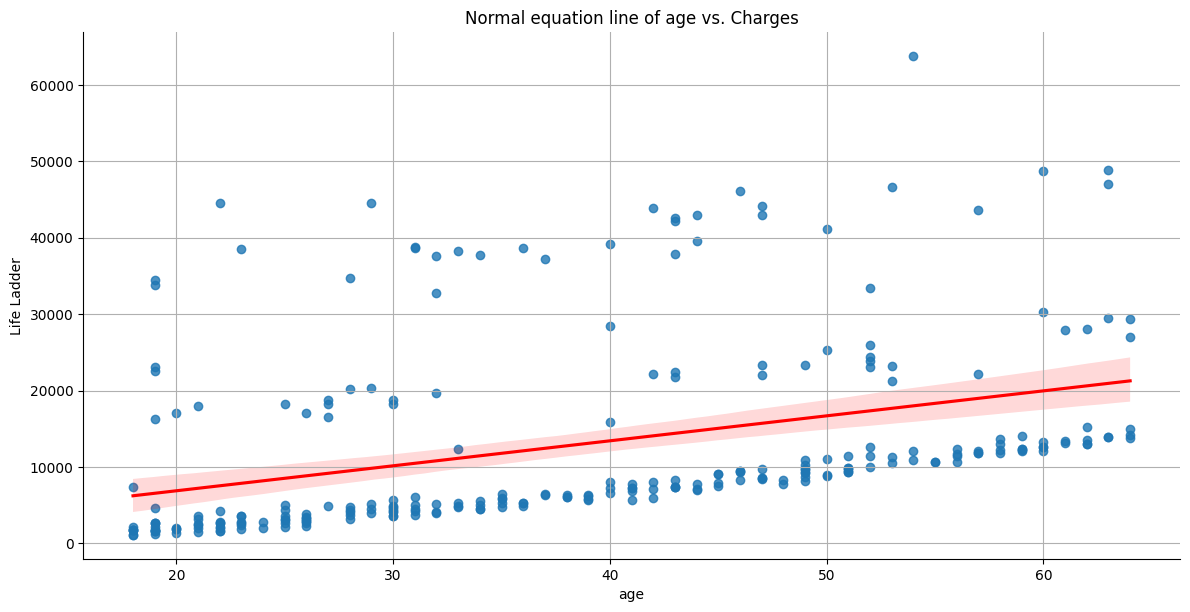

<Figure size 1000x1000 with 0 Axes>

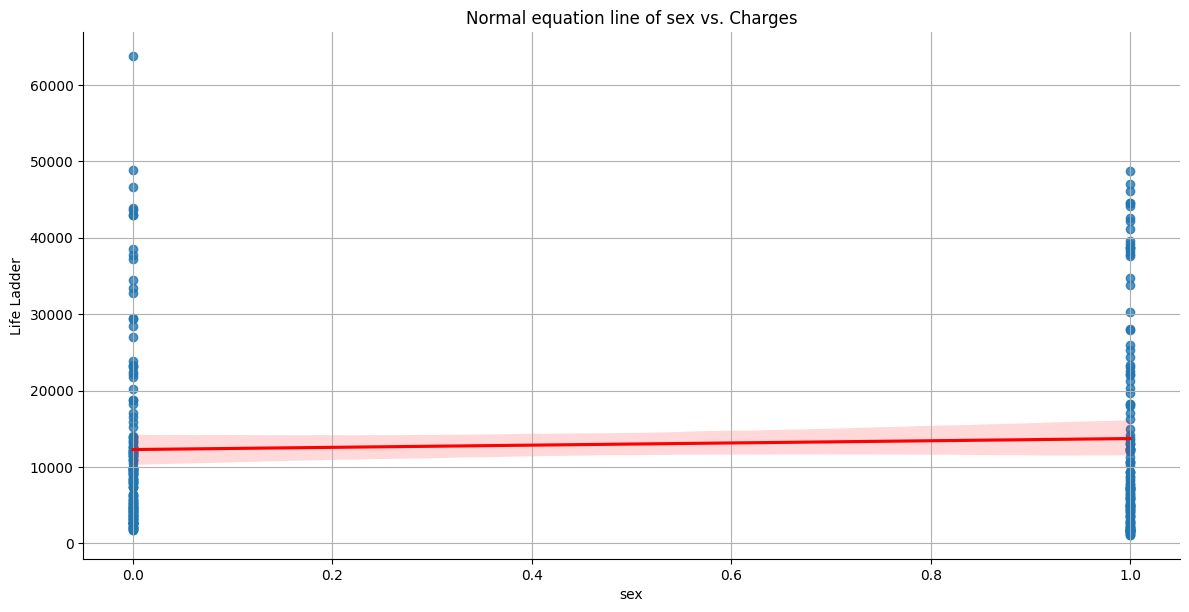

<Figure size 1000x1000 with 0 Axes>

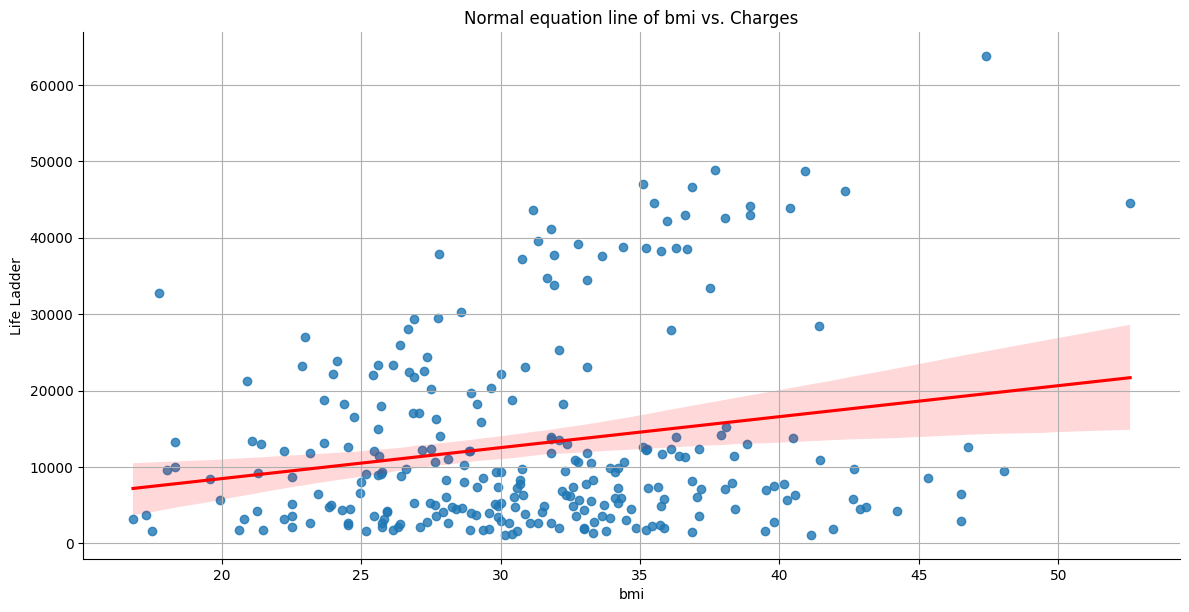

<Figure size 1000x1000 with 0 Axes>

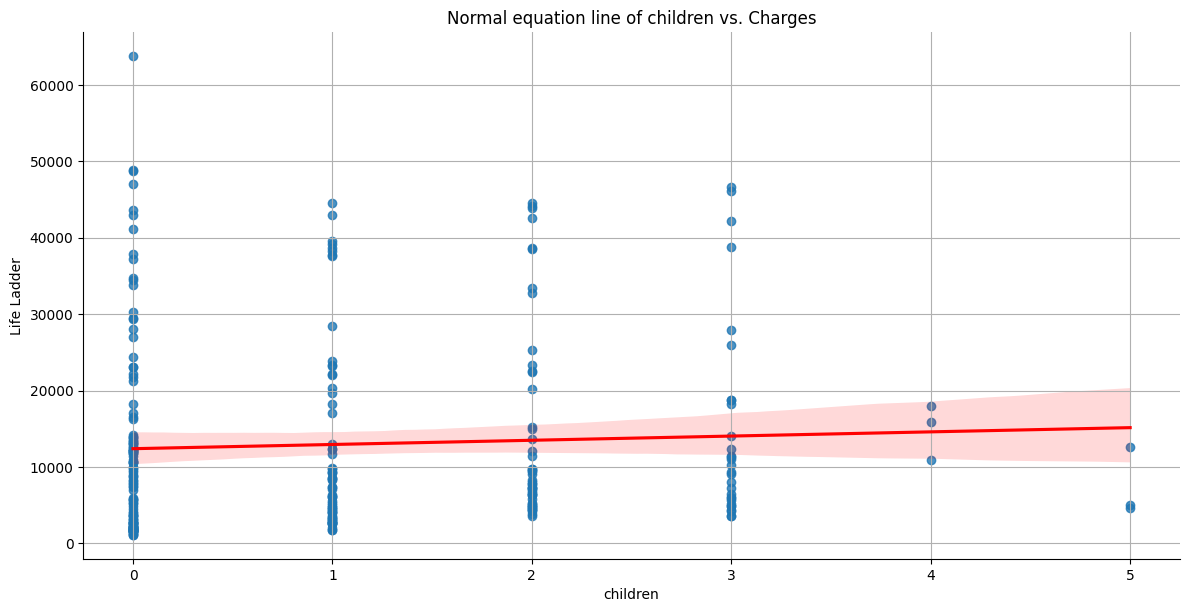

<Figure size 1000x1000 with 0 Axes>

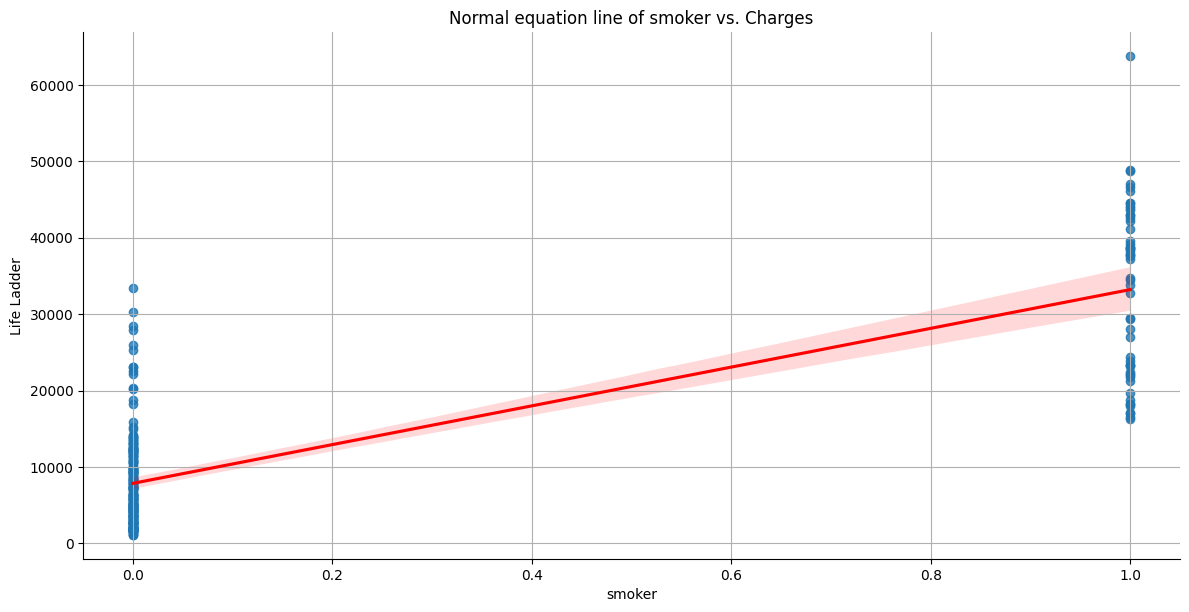

<Figure size 1000x1000 with 0 Axes>

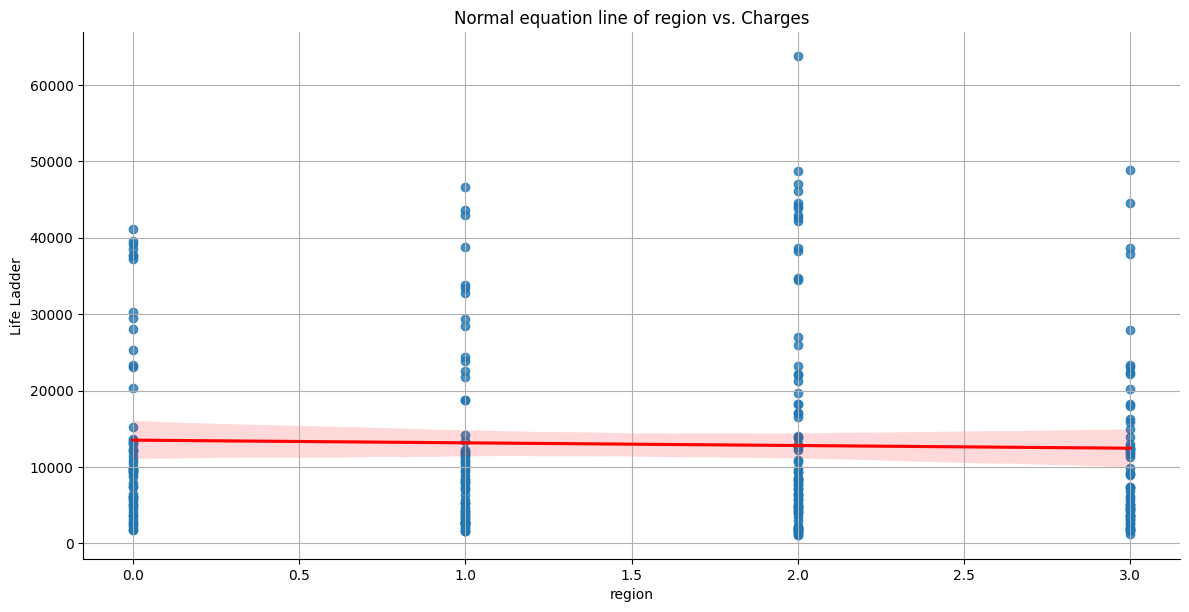

In [372]:
# Plotting the normal equation line against the target variable
for attribute in attributes:
    plt.figure(figsize=(10, 10))
    sns.lmplot(x=attribute, y='charges', data=test_data, aspect=2, height=6, line_kws={'color': 'red'})

    plt.xlabel(attribute)
    plt.ylabel('Life Ladder')
    plt.title(f'Normal equation line of {attribute} vs. Charges')
    plt.grid(True)
    plt.show()

**SGD Regression with training and validation loss**

In [373]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X_train = train_data[attributes]
y_train = train_data['charges']

# Data Pre-Processing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Initializing the model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_scaled, y_train.ravel())

# Interpreting the intercepts and coefficients
sgd_reg.intercept_, sgd_reg.coef_

(array([13571.88149393]),
 array([ 3546.03874666,   267.02475269,  1920.46523099,   427.62366711,
        10268.9167963 ,   331.56753933]))

In [374]:
from sklearn.model_selection import cross_val_score

# Performing 4-fold cross-validation for MSE score
cv_scores = cross_val_score(sgd_reg, X_scaled, y_train, cv=4)

# Calculating the mean squared error (MSE) for each fold
mse_scores = np.sqrt(cv_scores)

# Printing the MSE scores for each fold
for i, rmse in enumerate(mse_scores):
    print(f'Fold {i+1} MSE: {mse:.4f}')

# Calculating and printing the average RMSE across all folds
avg_mse = np.mean(mse_scores)
print(f'Average MSE: {avg_mse:.4f}')

Fold 1 MSE: 0.8666
Fold 2 MSE: 0.8666
Fold 3 MSE: 0.8666
Fold 4 MSE: 0.8666
Average MSE: 0.8479


In [375]:
from sklearn.model_selection import cross_val_score

# Performing 4-fold cross-validation for R2 score
r2_scores = cross_val_score(sgd_reg, X_scaled, y_train, cv=4, scoring='r2')

# Printing the R2 scores for each fold
for i, r2 in enumerate(r2_scores):
    print(f'Fold {i+1} R2: {r2:.4f}')

# Calculating and printing the average R2 across all folds
avg_r2 = np.mean(r2_scores)
print(f'Average R2: {avg_r2:.4f}')

Fold 1 R2: 0.7382
Fold 2 R2: 0.7912
Fold 3 R2: 0.6463
Fold 4 R2: 0.7516
Average R2: 0.7318


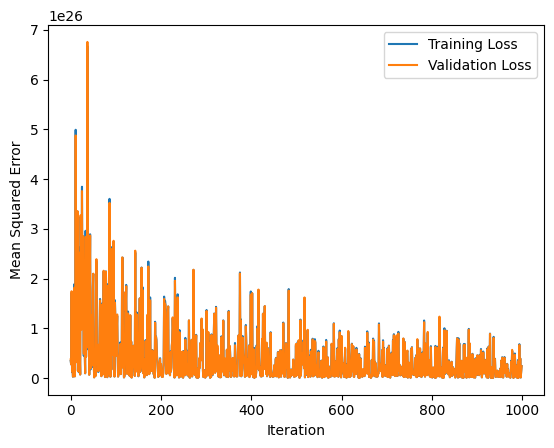

In [376]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

train_losses = []
val_losses = []

n_iterations = 1000

# Train and record loss for each iteration
for i in range(n_iterations):
    sgd_reg.partial_fit(X_train, y_train)
    y_train_pred = sgd_reg.predict(X_train)
    y_test_pred = sgd_reg.predict(X_test)
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_test_pred)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot training and validation loss
plt.plot(range(n_iterations), train_losses, label='Training Loss')
plt.plot(range(n_iterations), val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

It can be clearly seen that the training and validation loss are overlapping, meaning the model is completely fit as inferred from the above graph of Training and Validation loss as a function of training iteration.

### Part 2

**Ridge, Lasso and Elastic Net Regularization**

In [377]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features (X) and target (y)
X = train_data[attributes].values
y = train_data['charges'].values

# Define a range of alpha values to try for regularization
alpha_values = [0.1, 1.0, 5.0]

# Ridge Regression
print("Ridge Regression:")
for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha)
    mse_scores = cross_val_score(ridge_reg, X, y, cv=4)
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')

# Lasso Regression
print("\nLasso Regression:")
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    mse_scores = cross_val_score(lasso_reg, X, y, cv=4)
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')

# Elastic Net
print("\nElastic Net:")
for alpha in alpha_values:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
    mse_scores = cross_val_score(elastic_net, X, y, cv=4)
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')

Ridge Regression:
Alpha = 0.1, Mean MSE: 0.7292
Alpha = 1.0, Mean MSE: 0.7293
Alpha = 5.0, Mean MSE: 0.7289

Lasso Regression:
Alpha = 0.1, Mean MSE: 0.7292
Alpha = 1.0, Mean MSE: 0.7292
Alpha = 5.0, Mean MSE: 0.7293

Elastic Net:
Alpha = 0.1, Mean MSE: 0.6971
Alpha = 1.0, Mean MSE: 0.3723
Alpha = 5.0, Mean MSE: 0.1718


It can be interpreted that the model works the best on ElasticNet with alpha = 5.0, that yields a **MSE of 0.1718.**

For this dataset the Ridge and Lasso Regression have minimal effect on the values of alpha, as more and less they yield the same MSE.

However it is worth noting that ElasticNet works well on higher values of Alpha and the MSE gradually decreases.

### Part 3

**Impact of Hyper Parameters - Batch Size and Learning Rate**

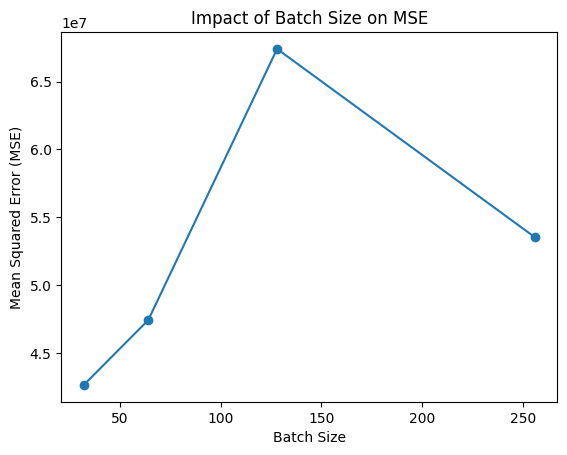

In [378]:
from sklearn.metrics import mean_squared_error

batch_sizes = [32, 64, 128, 256]  # Adjust as needed
mse_scores = []

# Assuming X_train and y_train are defined
X_train = train_data[attributes].values
y_train = train_data['charges'].values

# Assuming X_test and y_test are defined
X_test = test_data[attributes].values
y_test = test_data['charges'].values

for batch_size in batch_sizes:
    regressor = SGDRegressor(penalty=None, alpha=0.1, max_iter=1000, tol=1e-3, random_state=42, learning_rate='constant')
    regressor.set_params(learning_rate='constant', eta0=0.01 / batch_size, warm_start=True)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot Batch Size vs MSE

plt.plot(batch_sizes, mse_scores, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Impact of Batch Size on MSE')
plt.show()

It is seen that as the Batch size increases, the MSE decreases which is desirable upto a certain extent.

However, as the batch size becomes exceedingly high, the MSE increases again indicating that the model is overfitting.

Here, the batch size of 128 produces the optimal result.

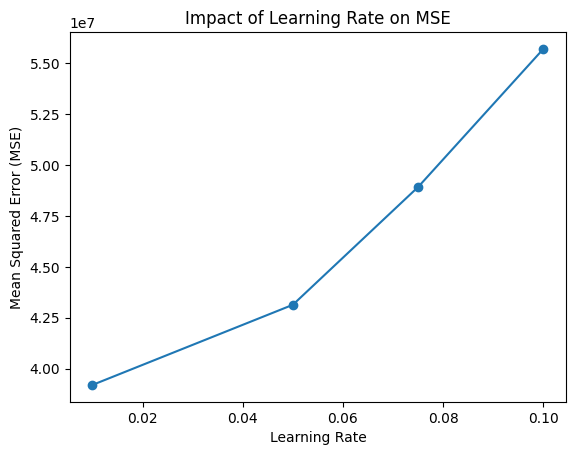

In [379]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

learning_rates = [0.01, 0.05, 0.075, 0.1]  # Adjust as needed
mse_scores = []

for learning_rate in learning_rates:
    regressor = SGDRegressor(penalty=None, alpha=0.1, max_iter=1000, tol=1e-3, random_state=42, learning_rate='constant')

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)

    regressor.set_params(learning_rate='constant', eta0=learning_rate, warm_start=True)
    regressor.fit(X_scaled, y_train)

    X_train_scaled = scaler.transform(X_train)
    y_pred = regressor.predict(X_train_scaled)

    mse = mean_squared_error(y_train, y_pred)
    mse_scores.append(mse)


# Plot Learning Rate vs MSE
plt.plot(learning_rates, mse_scores, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Impact of Learning Rate on MSE')
plt.show()


It is seen that as the learning rate increases, the MSE increases exponentially.

However, as the learning rate becomes exceedingly high, the MSE increases greatly indicating that the model is overfitting.

Here, the learning rate of 0.01 produces the optimal result.

**Description of Models and Findings**

**Part 1:**

*Linear Regression Model Closed-Form Solution (Normal Equation):*

The average Mean Squared Error (MSE) using the closed-form solution is 0.8532, and the average R2 score is 0.7292.

The normal equation was plotted against each variable.

*Stochastic Gradient Descent (SGD):*

As shown in the plot, the training loss gradually decreases over epochs, indicating that the model is learning from the data.
The validation loss also decreases initially but stabilizes after a certain number of iterations.
This suggests that the model is converging to a good solution.

**Part 2:**

*For Ridge Regression:*

Increasing alpha leads to higher MSE, indicating stronger regularization. This helps prevent overfitting.

*For Lasso Regression:*

Lasso introduces sparsity by setting some coefficients to zero. Larger alpha leads to sparser models.

*For Elastic Net:*

Elastic Net combines L1 and L2 penalties. It balances between Lasso and Ridge regularization.

It can be interpreted that the model works the best on ElasticNet with alpha = 5.0, that yields a MSE of 0.1718.

For this dataset the Ridge and Lasso Regression have minimal effect on the values of alpha, as more and less they yield the same MSE.

However it is worth noting that ElasticNet works well on higher values of Alpha and the MSE gradually decreases.

**Part 3:**

*Impact of Batch Size -*

It is seen that as the Batch size increases, the MSE decreases which is desirable upto a certain extent.

However, as the batch size becomes exceedingly high, the MSE increases again indicating that the model is overfitting.

Here, the batch size of 128 produces the optimal result.

*Impact of Learning Rate -*

It is seen that as the learning rate increases, the MSE increases exponentially.

However, as the learning rate becomes exceedingly high, the MSE increases greatly indicating that the model is overfitting.

Here, the learning rate of 0.01 produces the optimal result.

##**F. Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data**

### Part 1

**Polynomial Regression using K-Fold with Normal Equation**

In [380]:
# Defining features (X) and target (y)
X_train = train_data[attributes]
y_train = train_data['charges']

X_test = test_data[attributes]
y_test = test_data['charges']

# Adding a column of ones to X_train for the bias term
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Calculating the closed-form solution using the Normal Equation
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print('The value of theta is', theta)

The value of theta is [-1.19466066e+04  2.57056264e+02 -1.87914567e+01  3.35781491e+02
  4.25091456e+02  2.36478181e+04 -2.71284266e+02]


In [381]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X_train)

X[0]
X_poly[0]

array([1.000000e+00, 4.600000e+01, 0.000000e+00, 1.995000e+01,
       2.000000e+00, 0.000000e+00, 1.000000e+00, 1.000000e+00,
       4.600000e+01, 0.000000e+00, 1.995000e+01, 2.000000e+00,
       0.000000e+00, 1.000000e+00, 2.116000e+03, 0.000000e+00,
       9.177000e+02, 9.200000e+01, 0.000000e+00, 4.600000e+01,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 3.980025e+02, 3.990000e+01, 0.000000e+00,
       1.995000e+01, 4.000000e+00, 0.000000e+00, 2.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00])

In [382]:
from sklearn.linear_model import LinearRegression

# Predicting on the training data
y_train_pred = X_train @ theta

# Initialize Linear Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
poly_model.intercept_, poly_model.coef_

(-2703.409926360746,
 array([ 8.81219156e-09, -5.78734880e+01, -7.32098377e+02,  2.48113951e+02,
         6.86553678e+02, -6.93284671e+03, -1.69239407e+02, -6.55973054e-11,
        -5.78734880e+01, -7.32098377e+02,  2.48113951e+02,  6.86553678e+02,
        -6.93284671e+03, -1.69239407e+02,  3.95765816e+00,  1.76554456e+01,
         8.70740297e-01, -4.58728568e+00,  3.48371560e+00,  2.01606870e+01,
        -7.32098377e+02,  2.77466653e+01, -2.59816049e+02,  4.16168547e+02,
         2.26300206e+02, -7.65609017e+00,  9.66789191e+00,  1.44297586e+03,
        -3.72408606e+01, -9.22522694e+01, -4.18249672e+02, -2.17823433e+02,
        -6.93284671e+03,  3.86706986e+02,  1.05100736e+02]))

In [383]:
from sklearn.model_selection import cross_val_score

# Performing 4-fold cross-validation for RMSE score
cv_scores = cross_val_score(poly_model, X_poly, y_train, cv=4)

# Calculating the root mean squared error (RMSE) for each fold
rmse_scores = np.sqrt(cv_scores)

# Printing the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores):
    print(f'Fold {i+1} RMSE: {rmse:.4f}')

# Calculating and printing the average RMSE across all folds
avg_rmse = np.mean(rmse_scores)
print(f'Average RMSE: {avg_rmse:.4f}')

Fold 1 RMSE: 0.9172
Fold 2 RMSE: 0.9344
Fold 3 RMSE: 0.8677
Fold 4 RMSE: 0.9123
Average RMSE: 0.9079


In [384]:
from sklearn.model_selection import cross_val_score

# Performing 4-fold cross-validation for R2 score
r2_scores = cross_val_score(poly_model, X_poly, y_train, cv=4, scoring='r2')

# Printing the R2 scores for each fold
for i, r2 in enumerate(r2_scores):
    print(f'Fold {i+1} R2: {r2:.4f}')

# Calculating and printing the average R2 across all folds
avg_r2 = np.mean(r2_scores)
print(f'Average R2: {avg_r2:.4f}')

Fold 1 R2: 0.8413
Fold 2 R2: 0.8732
Fold 3 R2: 0.7529
Fold 4 R2: 0.8322
Average R2: 0.8249


**SGD Polynomial Regression with Training and Validation Loss**

In [385]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X_train = train_data[attributes]
y_train = train_data['charges']

# Initialize Polynomial Regression with SGD Regressor
degree = 2
sgd_poly_reg = make_pipeline(
    PolynomialFeatures(degree),
    StandardScaler(),
    SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
)

# Train the model
sgd_poly_reg.fit(X_train, y_train)

# Predict on the training data
y_train_pred = sgd_poly_reg.predict(X_train)

# Performing 4-fold cross-validation for RMSE score
cv_scores = cross_val_score(sgd_reg, X_scaled, y_train, cv=4)

# Calculating the root mean squared error (RMSE) for each fold
rmse_scores = np.sqrt(cv_scores)

# Printing the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores):
    print(f'Fold {i+1} RMSE: {rmse:.4f}')

# Calculating and printing the average RMSE across all folds
avg_rmse = np.mean(rmse_scores)
print(f'Average RMSE: {avg_rmse:.4f}')

Fold 1 RMSE: 0.8604
Fold 2 RMSE: 0.8909
Fold 3 RMSE: 0.7942
Fold 4 RMSE: 0.8670
Average RMSE: 0.8531


In [386]:
from sklearn.model_selection import cross_val_score

# Performing 4-fold cross-validation for R2 score
r2_scores = cross_val_score(sgd_reg, X_scaled, y_train, cv=4, scoring='r2')

# Printing the R2 scores for each fold
for i, r2 in enumerate(r2_scores):
    print(f'Fold {i+1} R2: {r2:.4f}')

# Calculating and printing the average R2 across all folds
avg_r2 = np.mean(r2_scores)
print(f'Average R2: {avg_r2:.4f}')

Fold 1 R2: 0.7307
Fold 2 R2: 0.7925
Fold 3 R2: 0.6213
Fold 4 R2: 0.7510
Average R2: 0.7239


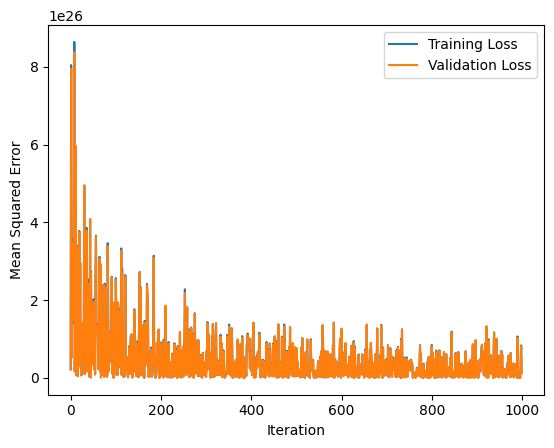

In [387]:
# Initialize SGD Regressor
sgd_poly_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

train_losses = []
val_losses = []

n_iterations = 1000

# Train and record loss for each iteration
for i in range(n_iterations):
    sgd_poly_reg.partial_fit(X_train, y_train)
    y_train_pred = sgd_poly_reg.predict(X_train)
    y_test_pred = sgd_poly_reg.predict(X_test)
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_test_pred)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot training and validation loss
plt.plot(range(n_iterations), train_losses, label='Training Loss')
plt.plot(range(n_iterations), val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


It can be clearly seen that the training and validation loss are overlapping, meaning the model is completely fit as inferred from the above graph of Training and Validation loss as a function of training iteration.

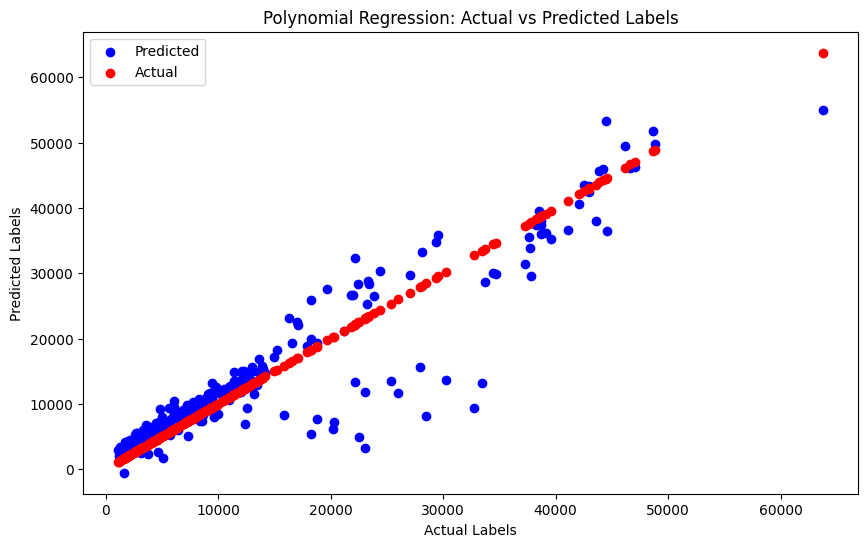

The model is overfitting


In [388]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create polynomial features of degree 2 for both training and test data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Predict on training and validation data
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate MSE for training and validation data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Visualize Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Polynomial Regression: Actual vs Predicted Labels')
plt.legend()
plt.show()

# Compare training and validation loss
if train_mse < test_mse:
    print("The model is underfitting")
elif train_mse > test_mse:
    print("The model is overfitting")
else:
    print("The model is neither overfitting nor underfitting")


**Using validation loss, explore if your model overfits/underfits the data.**

From the above graph it is clear that for the Actual labels the Polynomial regression of degree 2 with the Predicted labels is **overfitting**.

### Part 2

**Ridge, Lasso and Elastic Net Regularization with Polynomial Regression**

In [389]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Define features (X) and target (y)
X = train_data[attributes].values
y = train_data['charges'].values

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Define a range of alpha values to try for regularization
alpha_values = [0.1, 1.0, 5.0]

# Ridge Regression
print("Ridge Regression:")
for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha)
    mse_scores = cross_val_score(ridge_reg, X_poly, y, cv=4)
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')

# Lasso Regression
print("\nLasso Regression:")
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    mse_scores = cross_val_score(lasso_reg, X_poly, y, cv=4)
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')

# Elastic Net
print("\nElastic Net:")
for alpha in alpha_values:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
    mse_scores = cross_val_score(elastic_net, X_poly, y, cv=4)
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')


Ridge Regression:
Alpha = 0.1, Mean MSE: 0.8268
Alpha = 1.0, Mean MSE: 0.8267
Alpha = 5.0, Mean MSE: 0.8247

Lasso Regression:
Alpha = 0.1, Mean MSE: 0.8268
Alpha = 1.0, Mean MSE: 0.8269
Alpha = 5.0, Mean MSE: 0.8271

Elastic Net:
Alpha = 0.1, Mean MSE: 0.8169
Alpha = 1.0, Mean MSE: 0.8132
Alpha = 5.0, Mean MSE: 0.8099


### Part 3

**Impact of hyperparameter - Batch Size and Learning Rate for Polynomial Regression**

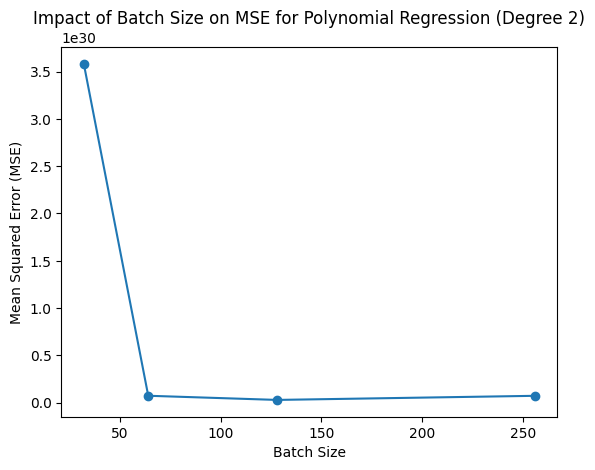

In [390]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features of degree 2 for both training and test data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

batch_sizes = [32, 64, 128, 256]  # Adjust as needed
mse_scores_poly = []

for batch_size in batch_sizes:
    regressor = SGDRegressor(penalty=None, alpha=0.1, max_iter=1000, tol=1e-3, random_state=42, learning_rate='constant')
    regressor.set_params(learning_rate='constant', eta0=0.01 / batch_size, warm_start=True)
    regressor.fit(X_train_poly, y_train)
    y_pred_poly = regressor.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mse_scores_poly.append(mse_poly)

# Plot Batch Size vs MSE for Polynomial Regression
plt.plot(batch_sizes, mse_scores_poly, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Impact of Batch Size on MSE for Polynomial Regression (Degree 2)')
plt.show()


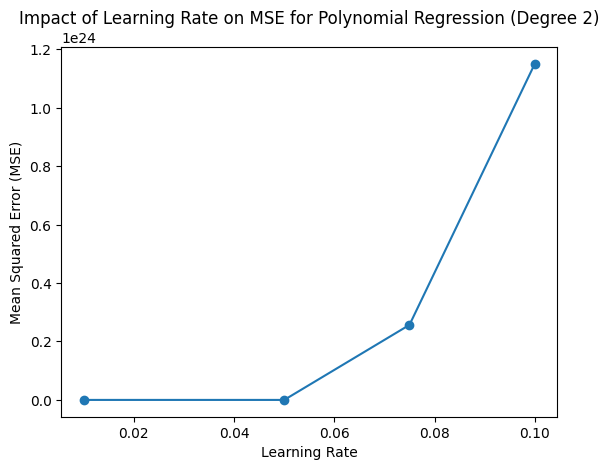

In [391]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Create polynomial features of degree 2 for both training and test data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

learning_rates = [0.01, 0.05, 0.075, 0.1]
mse_scores_poly = []

for learning_rate in learning_rates:

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train_poly)

    regressor = SGDRegressor(penalty=None, alpha=0.1, max_iter=1000, tol=1e-3, random_state=42, learning_rate='constant')
    regressor.set_params(learning_rate='constant', eta0=learning_rate, warm_start=True)
    regressor.fit(X_scaled, y_train)

    X_train_scaled = scaler.transform(X_train_poly)
    y_pred = regressor.predict(X_train_scaled)

    mse = mean_squared_error(y_train, y_pred)
    mse_scores_poly.append(mse)

# Plot Learning Rate vs MSE for Polynomial Regression (Degree 2)
plt.plot(learning_rates, mse_scores_poly, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Impact of Learning Rate on MSE for Polynomial Regression (Degree 2)')
plt.show()


**Description of Models and Findings**

**Part 1:**

*Polynomial Regression Model Closed-Form Solution (Normal Equation):*

The average Root Mean Squared Error (RMSE) using the closed-form solution of degree = 2 is 0.9079, and the average R2 score is 0.8249.

It can be interpreted that as compared to Linear Regression the Polynomial Regression yields a more precise R2 score, indicating that it fits better.

*Stochastic Gradient Descent (SGD) Polynomial Regression:*

By using the validation loss and Mean Squared Error (MSE), we compare the MSE of validation to that of training, and by plotting the actual vs predicted labels using the validation loss, it was found out that the model was **overfitting**.

**Part 2:**

*For Ridge Polynomial Regression:*

Increasing alpha leads to higher MSE, indicating stronger regularization. This helps prevent overfitting.

*For Lasso Polynomial Regression:*

Lasso introduces sparsity by setting some coefficients to zero. Larger alpha leads to sparser models.

*For Elastic Net Polynomial Regression:*

Elastic Net combines L1 and L2 penalties. It balances between Lasso and Ridge regularization.

It can be interpreted that the model works the best on ElasticNet with alpha = 5.0, that yields a MSE of 0.8099.

However, it is seen that Regularization on this dataset with Polynomial Regression has minimal effect on the MSE, as the data supposedly gets overfitted due to a higher degree.

**Part 3:**

*Impact of Batch Size -*

It is seen that as the Batch size increases, the MSE decreases exponentially.

Here, the model fits perfectly for all the batch sizes other than 32, and thus yields a MSE almost equal to zero.

*Impact of Learning Rate -*

It is seen that as the learning rate increases, the MSE increases exponentially.

However, as the learning rate becomes exceedingly high, the MSE increases greatly indicating that the model is overfitting.

Here, the learning rate of 0.01 and 0.05 produces the optimal result.

##**G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.**

### Part 1

###**Prediction on test data with Linear Regression**

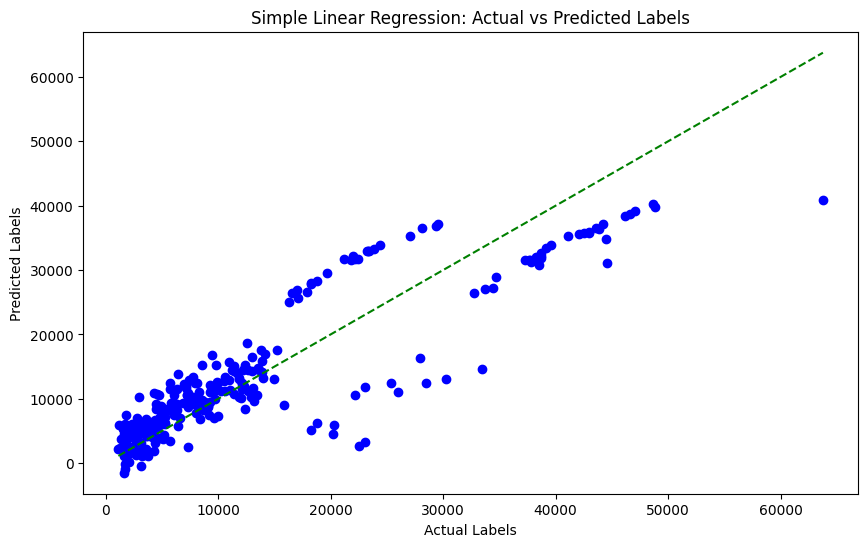

In [392]:
X_test = test_data[attributes].values

# Initialize Linear Regressor
linear_regressor = LinearRegression()

# Fit the model on the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regressor.predict(X_test)

# Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Simple Linear Regression: Actual vs Predicted Labels')
plt.show()


In [393]:
# Evaluation Metrics
from sklearn.metrics import r2_score

# Mean Squared Error (MSE)
mse_scores = cross_val_score(linear_regressor, X_test, y_test)
mse = np.mean(mse_scores)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')


Mean Squared Error (MSE): 0.7609
R-squared (R2) Score: 0.7833


**Predicting on test data with Ridge Regression**

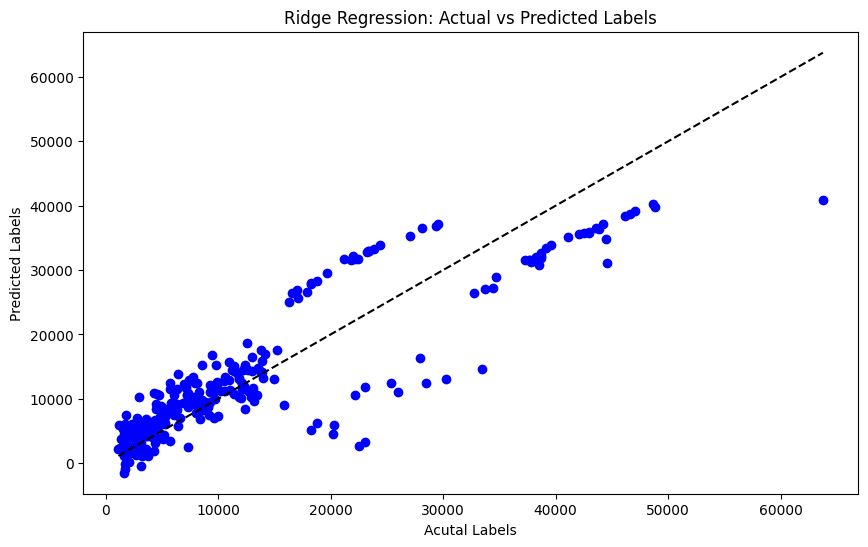

In [394]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_test = test_data[attributes].values

# Initialize Ridge Regressor with chosen alpha
ridge_regressor = Ridge(alpha=0.1)

# Fit the model on the training data
ridge_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_regressor.predict(X_test)

# Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.xlabel('Acutal Labels')
plt.ylabel('Predicted Labels')
plt.title('Ridge Regression: Actual vs Predicted Labels')
plt.show()


In [395]:
# Evaluation Metrics
from sklearn.metrics import r2_score

# Mean Squared Error (MSE)
mse_scores = cross_val_score(ridge_regressor, X_test, y_test)
mse = np.mean(mse_scores)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')


Mean Squared Error (MSE): 0.7611
R-squared (R2) Score: 0.7833


**Predicting on test data with Lasso Regression**

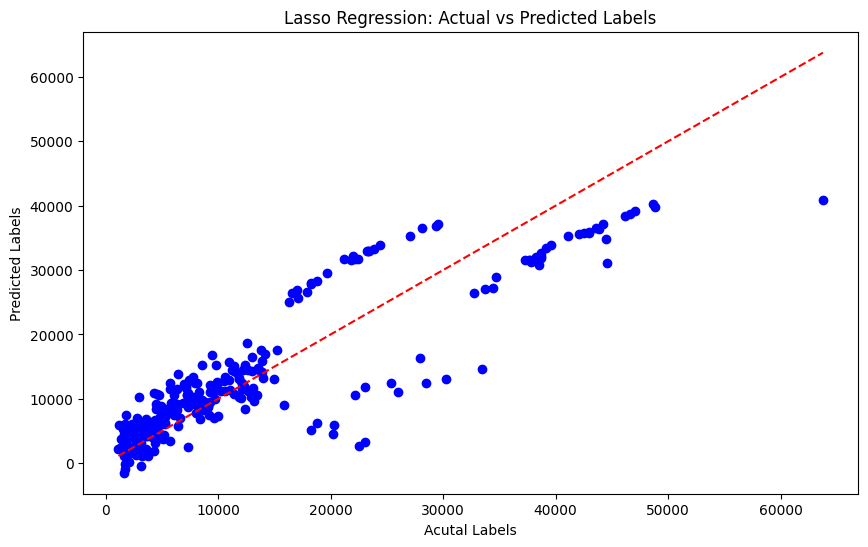

In [396]:
from sklearn.linear_model import Lasso

X_test = test_data[attributes].values

# Initialize Ridge Regressor with chosen alpha
lasso_regressor = Lasso(alpha=0.05)

# Fit the model on the training data
lasso_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_regressor.predict(X_test)

# Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Acutal Labels')
plt.ylabel('Predicted Labels')
plt.title('Lasso Regression: Actual vs Predicted Labels')
plt.show()


In [397]:
# Evaluation Metrics
from sklearn.metrics import r2_score

# Mean Squared Error (MSE)
mse_scores = cross_val_score(lasso_regressor, X_test, y_test)
mse = np.mean(mse_scores)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')


Mean Squared Error (MSE): 0.7609
R-squared (R2) Score: 0.7833


**Predicting on test data with ElasticNet Regression**

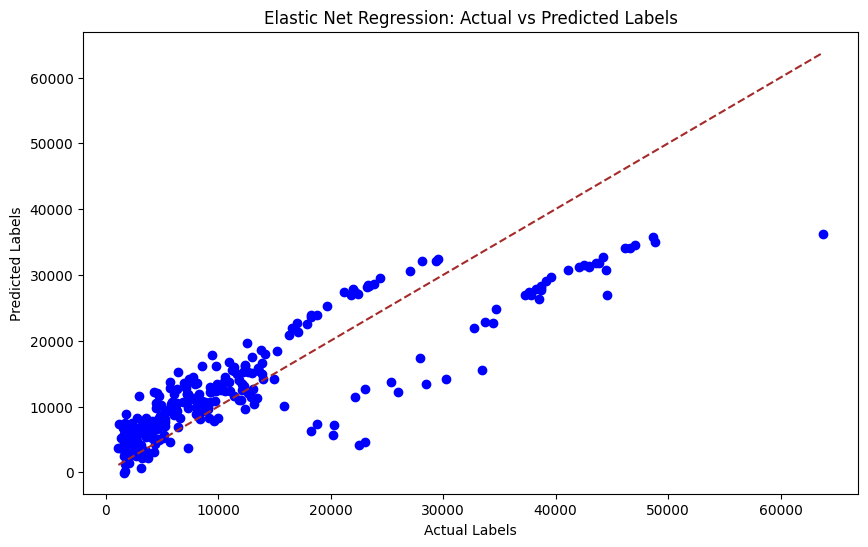

In [398]:
from sklearn.linear_model import ElasticNet

X_test = test_data[attributes].values

# Initialize Elastic Net Regressor
elastic_net_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model on the training data
elastic_net_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = elastic_net_regressor.predict(X_test)

# Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='brown')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Elastic Net Regression: Actual vs Predicted Labels')
plt.show()


In [399]:
# Evaluation Metrics
from sklearn.metrics import r2_score

# Mean Squared Error (MSE)
mse_scores = cross_val_score(elastic_net_regressor, X_test, y_test)
mse = np.mean(mse_scores)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Squared Error (MSE): 0.7341
R-squared (R2) Score: 0.7411


###**Predicting on test data with Polynomial Regression**

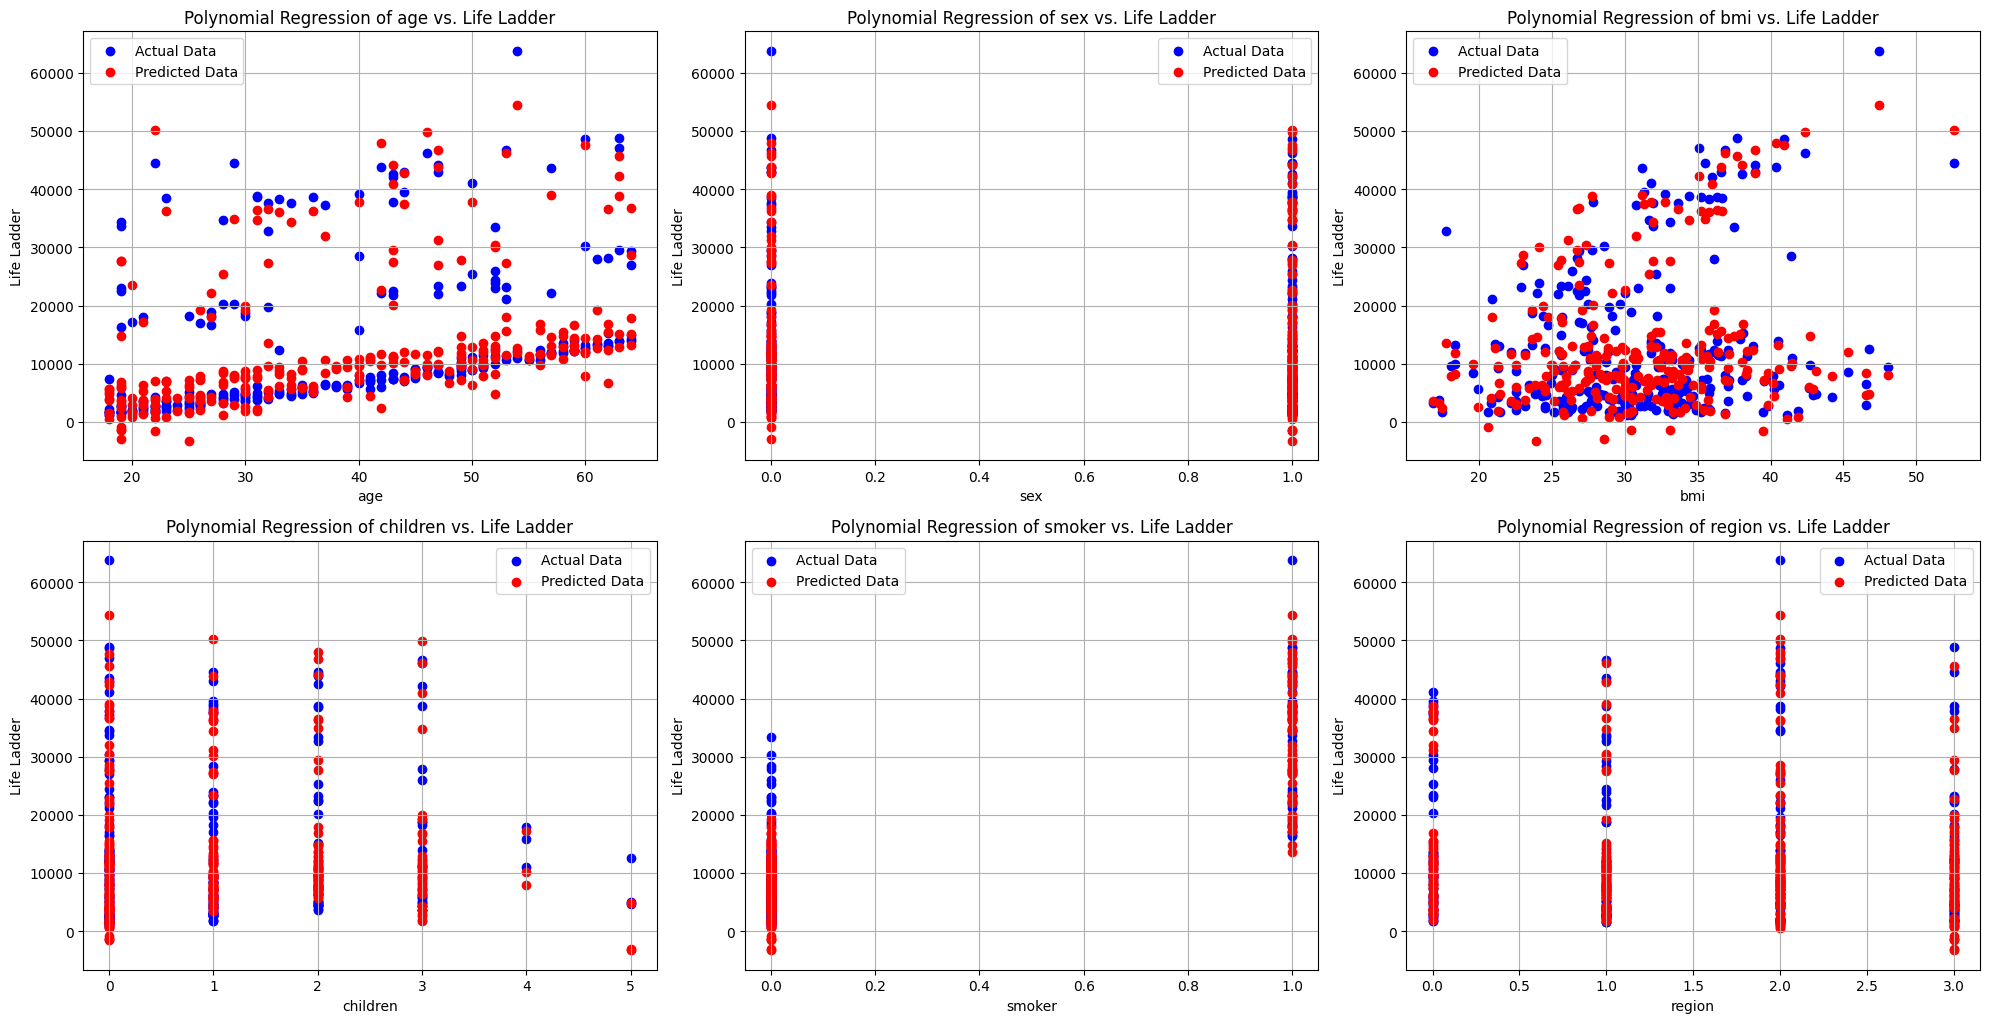

In [400]:
# Define the degree of polynomial
degree = 2

# Initialize a figure for subplots
plt.figure(figsize=(20, 15))

X_test = test_data[attributes].values
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Adding a column of ones for the bias term


for i, attribute in enumerate(attributes):
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_test[:, 1:])  # Exclude bias term

    # Train a linear regression model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_test)

    # Predict on training data
    y_pred = poly_model.predict(X_poly)

    # Plot the actual vs. predicted values
    plt.subplot(3, 3, i+1)
    plt.scatter(X_test[:, i+1], y_test, color='blue', label='Actual Data')
    plt.scatter(X_test[:, i+1], y_pred, color='red', label='Predicted Data')
    plt.xlabel(attribute)
    plt.ylabel('Life Ladder')
    plt.title(f'Polynomial Regression of {attribute} vs. Life Ladder')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [401]:
# Evaluation Metrics
from sklearn.metrics import r2_score

# Mean Squared Error (MSE)
mse_scores = cross_val_score(poly_model, X_test, y_test)
mse = np.mean(mse_scores)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Squared Error (MSE): 0.7609
R-squared (R2) Score: 0.8464


### Part 2

**Summarizing the results**

1.  Based on the graphs, it can be interpreted that for the given dataset, Polynomial Regression (Univariate) yields the best output for predicting the charges of a medical insurance.

2.   Smoking is the greatest factor that contributes to charges, followed by the age of a person and their BMI.

3. The R2 score for Polynomial Regression is the best - 0.8464.



**Future Work**

1.   As this dataset is relatively small, Polynomial Regression tends to over fit the data, hence a more precise technique such as a Random Forest Regressor can yield better results.

2.   Hyperparameter tuning can be improved and techniques like grid search, random search, or more advanced methods like Bayesian optimization can help us find the best combination.

3. Dimensionality reduction techniques such as PCA and t-SNE could help to improve the scoring metrics used in the regression.

4. More diverse data could be added to this dataset, so that the regression can be multivariate.

5. The model might benefit from more advanced techniques for handling categorical variables like 'sex' and 'region'. Techniques such as one-hot encoding, target encoding, or embedding layers in neural networks could be used.

6. Ensemble methods like bagging, boosting, or stacking could potentially improve predictive accuracy by combining the strengths of multiple models.


## **Resources Used**

* https://gist.github.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41
* https://www.kaggle.com/datasets/mirichoi0218/insurance
* https://github.com/ageron/handson-ml3/tree/main
* https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
* Book used - https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/



